## Exploratory Analysis of Haberman Dataset

Objective : Need to classify the querry data point whether the survival status of the patient will be 1 (i.e the patient survived 5 years or longer) or 2 (i.e the patient died within 5 years)

A formal Intrioduction to the data set:
* age = Age of patient at time of operation (numerical)
* year = Patient's year of operation (year - 1900, numerical)
* nodes = Number of positive axillary nodes detected (numerical)
* status = Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

# 1. Performing some high level Analysis

In [1]:
#importing all of the libraries and the csv file
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets

# import some data to play with
haberman = pd.read_csv("C://Users//jaska//Documents//Applied AI//Applied AI Codes//New Folder//haberman.csv")

In [2]:
print(haberman.shape)

(306, 4)


**Observations**

* therefore the dataset has 306 rows and 4 columns

In [3]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


**Observations**

* This shows that all the data columns have integer data type
* we need to convert the status feature to a categorical variable i.e stating 1 as "Positive" and 2 as "Neagtive
* There is no missing value

In [4]:
haberman["status"] = haberman["status"].apply(lambda x: "Positive" if x == 1 else "Negative")

In [5]:
print(haberman.describe())

              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


**Observation**

* The features age and year's mean and median value are near to each other and their max and 75th percentile value is not that far away from the median and the mean value. hence denotes a good spread among the data
* considering the nodes feature, there is a lot difference between the 75th percentile and the maximum value. indicating the presence of outliers (the maximum value of 52 >> mean value of 4)
* In the nodes column. The 75th percentile value still looks good. But lets find out how many data points are present within 75th percentile and the maximum value

In [18]:
print(haberman[haberman["nodes"]>4].count())

age       76
year      76
nodes     76
status    76
dtype: int64


**Observations**

* 76 rows have nodes value > 4. which amounts to significant information
* some outlier treatment can be done (condition to scope of the given assignment)

# 2. Univariate and Bivariate Analysis 

## 2.1 Pair Plot

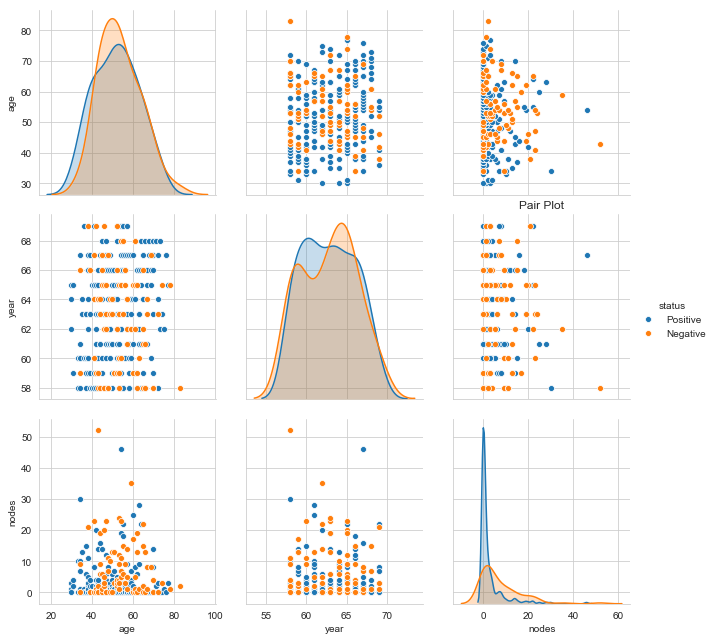

In [41]:
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status", height=3)

**Observations**

* As can be seen from the various pair plot against the various features, we can conclude that none of the pair plot graph looks convincing to decide whether a distinction can be made to seperate the negative and positive class points.

## 2.2 Scatter Plot

Scatter Plot - 1


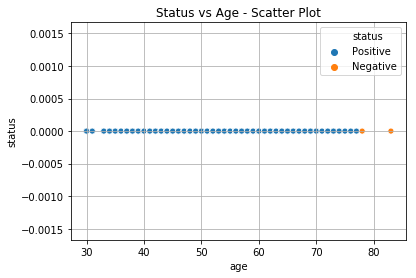

In [39]:
sns.scatterplot(x="age", hue = "status", y=0, data=haberman)
plt.title("Status vs Age - Scatter Plot")
plt.ylabel("status")
plt.grid()
print("Scatter Plot - 1")

Scatter Plot - 2


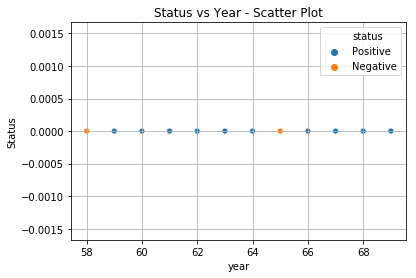

In [38]:
sns.scatterplot(x="year", hue = "status", y=0, data=haberman)
plt.title("Status vs Year - Scatter Plot")
plt.ylabel("status")
plt.grid()
print("Scatter Plot - 2")

Scatter Plot - 3


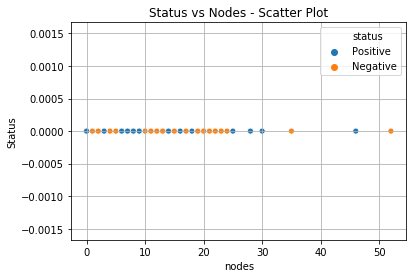

In [37]:
sns.scatterplot(x="nodes", hue = "status", y=0, data=haberman)
plt.title("Status vs Nodes - Scatter Plot")
plt.ylabel("status")
plt.grid()
print("Scatter Plot - 3")

**Observations**

* As can be seen in these 3 scatter plots, the data points highly overlap with each other

## 2.3 Histogram and PDF

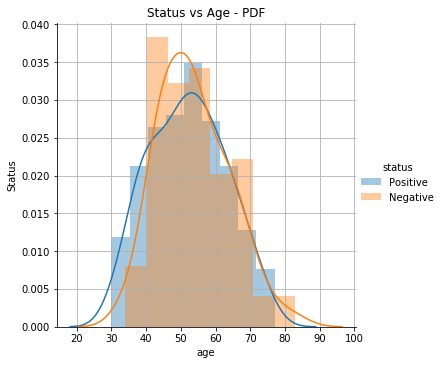

In [36]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title("Status vs Age - PDF")
plt.ylabel("status")
plt.grid()
plt.show();

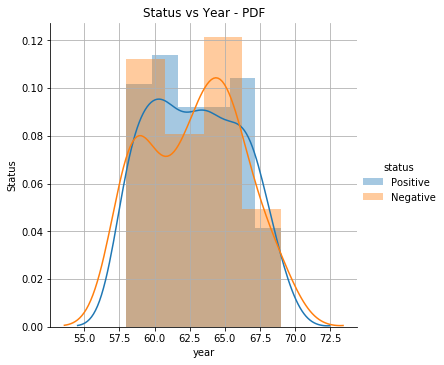

In [35]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title("Status vs Year - PDF")
plt.ylabel("status")
plt.grid()
plt.show();

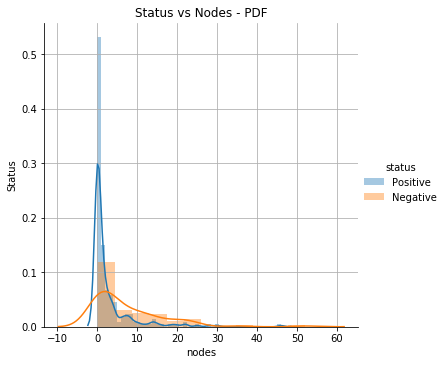

In [34]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title("Status vs Nodes - PDF")
plt.ylabel("status")
plt.grid()
plt.show();

**Observations**

* The PDF of "age" seems a lot similar to the bell shape.
* The PDF of "age" and "year" are highly overlapping, hence not giving a clear picture on how to seperate Positive and Negative class data points.
* There is a peak in the PDF of "nodes - Positive" class graph. Indicating that a considerate amount of data points have nodes value between 0 and 3. therefore the probability of data point being classified as Positive in this interval is higher than that to be Negative.
* For data points falling after this interval have higher tendency to be classified as Negative, but after the 0 to 3 interval the PDF of negative class is just marginally above the positive class PDF, which can lead to high possibility of error in the decision
* Taking the "nodes" feature as the important one. Carrying the further analysis

## 2.4 CDF

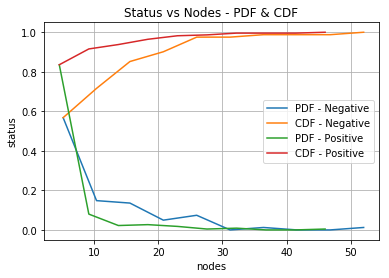

In [33]:
# CDF and PDF on Nodes variable

#seperating the data set according to negative and positive classes
Negative, Positive = [x for _, x in haberman.groupby(haberman['status'])]

counts, bin_edges = np.histogram(Negative['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF - Negative")
plt.plot(bin_edges[1:], cdf, label = "CDF - Negative")
plt.legend()

counts, bin_edges = np.histogram(Positive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF - Positive")
plt.plot(bin_edges[1:], cdf, label = "CDF - Positive")
plt.legend()

plt.xlabel('nodes')
plt.ylabel('status')
plt.title("Status vs Nodes - PDF & CDF")

plt.grid()
plt.show()

* At nodes value = 5. The probability a data point will belong to Positive class is 0.85 and to Negative class is 0.58 approx.
* At any other considerable interval the possibility of a data point to be either of the class is equally likely.

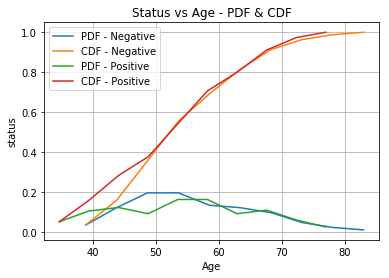

In [32]:
# CDF and PDF on age variable

counts, bin_edges = np.histogram(Negative['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF - Negative")
plt.plot(bin_edges[1:], cdf, label = "CDF - Negative")
plt.legend()

counts, bin_edges = np.histogram(Positive['age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF - Positive")
plt.plot(bin_edges[1:], cdf, label = "CDF - Positive")
plt.legend()

plt.xlabel('Age')
plt.ylabel('status')
plt.title("Status vs Age - PDF & CDF")

plt.grid()
plt.show()

* The CDF and PDF of Age variable are highly overlaping with each other and hence to deduce any insight from this is very difficult.

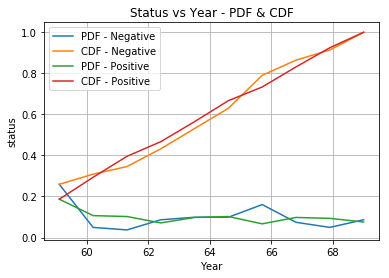

In [31]:
Negative, Positive = [x for _, x in haberman.groupby(haberman['status'])]

counts, bin_edges = np.histogram(Negative['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF - Negative")
plt.plot(bin_edges[1:], cdf, label = "CDF - Negative")
plt.legend()

counts, bin_edges = np.histogram(Positive['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF - Positive")
plt.plot(bin_edges[1:], cdf, label = "CDF - Positive")
plt.legend()

plt.xlabel('Year')
plt.ylabel('status')
plt.title("Status vs Year - PDF & CDF")

plt.grid()
plt.show()

* The CDF and PDF of Year variable are highly overlaping with each other and hence to deduce any insight from this is very difficult.

## Box and Violin Plot

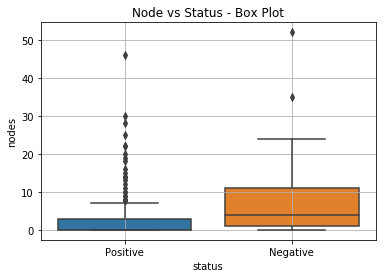

In [28]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Node vs Status - Box Plot")
plt.grid()
plt.show()

**Observations**

* the 50th percentile and the 25th percentile of the Positive class coincide with each other.
* There are a lot of outliers in the Positive class.
* Maximum Points lie in the 50th and 75th percentile range of the Negative Class.
* If a point has node value <= 5. the probability of it being classified as Positive is more.

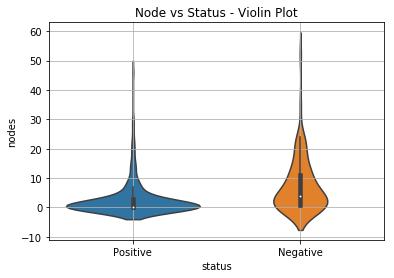

In [30]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("Node vs Status - Violin Plot")
plt.grid()
plt.show()

**Observations**

* The Violin Plot explains the spread in the data. The spread in the data between the node count of 0 to 5 is more in Positive Class as compared to Negative Class

# Conclusions

* From PDF, CDF and Box Plot we can see that the node feature appears to be the best feature to classify the data on.
* Even though the PDF of nodes overlap a lot. still we can segeregate the points as:

     if node value < 5 -> Positive
     
     if node value between 6 to 12 -> Negative